In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, roc_auc_score
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [113]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [114]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [116]:
train_df["text length"] = train_df["text"].apply(len)

In [117]:
test_df["text length"] = test_df["text"].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4F929A2C8>,
      dtype=object)

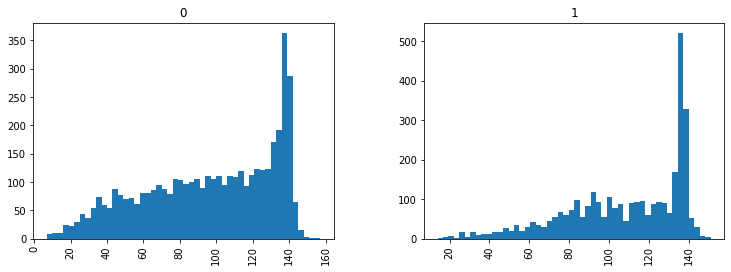

In [118]:
train_df.hist(column="text length", by="target", bins=50,figsize=(12,4))

In [119]:
import nltk
nltk.download_shell()
import string
from nltk.corpus import stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [120]:
def text_process(mess): 
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [123]:
pipeline.fit(train_df["text"],train_df["target"])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002B4F78D9048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [124]:
cv = KFold(n_splits=4)
scores = model_selection.cross_val_score(pipeline, train_df["text"], train_df["target"], cv = cv)

In [125]:
scores

array([0.75315126, 0.74513925, 0.7283237 , 0.76142932])

In [126]:
scores.mean()

0.7470108839647263

In [127]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', linear_model.RidgeClassifier()),  
])

In [128]:
pipeline2.fit(train_df["text"],train_df["target"])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002B4F78D9048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                

In [129]:
scoresRR = model_selection.cross_val_score(pipeline2, train_df["text"], train_df["target"], cv = cv)

In [130]:
scoresRR

array([0.75262605, 0.72254335, 0.73515502, 0.74776668])

In [131]:
scoresRR.mean()

0.7395227763990515

In [132]:
# add a feature of the number of capital letters

train_df[train_df["target"] == 0]["text"].values[0:30]


array(["What's up man?", 'I love fruits', 'Summer is lovely',
       'My car is so fast', 'What a goooooooaaaaaal!!!!!!',
       'this is ridiculous....', 'London is cool ;)', 'Love skiing',
       'What a wonderful day!', 'LOOOOOOL',
       "No way...I can't eat that shit", 'Was in NYC last week!',
       'Love my girlfriend', 'Cooool :)', 'Do you like pasta?',
       'The end!',
       'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
       'Crying out for more! Set me ablaze',
       'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N',
       "@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.",
       'Ablaze for you Lord :D',
       'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw',
       "on the outside you're ablaze and alive\nbut you're dead inside",
       'Had an awesome time visiting the C

### Concatenate to for a single dataframe

In [133]:
df=pd.concat([train_df,test_df])
df.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10876, 6)

In [134]:
df

,id,keyword,location,target,text,text length
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...,69
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada,38
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...,133
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or...",65
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...,88
...,...,...,...,...,...,...
3258,10861,NaN,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,55
3259,10865,NaN,NaN,NaN,Storm in RI worse than last hurricane. My city...,139
3260,10868,NaN,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,55
3261,10874,NaN,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,65


### Remove urls and emojis

In [135]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)



In [136]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [137]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# remove_emoji("Omg another Earthquake 😔😔")

In [138]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [139]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [140]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [141]:
def remove_punctuations(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    
    if '...' not in text:
        text = text.replace('..', ' ... ')
    
    return text

In [142]:
df['text']=df['text'].apply(lambda x : remove_punctuations(x))

In [143]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [144]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [145]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [146]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [147]:
df['text']=df['text'].apply(lambda x : convert_abbrev_in_text(x))

In [148]:
df

,id,keyword,location,target,text,text length
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this earthquake Ma...,69
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask Canada,38
2,5,NaN,NaN,1.0,All residents asked to shelter in place are be...,133
3,6,NaN,NaN,1.0,13000 people receive wildfires evacuation orde...,65
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby Alaska as s...,88
...,...,...,...,...,...,...
3258,10861,NaN,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,55
3259,10865,NaN,NaN,NaN,Storm in RI worse than last hurricane My citya...,139
3260,10868,NaN,NaN,NaN,Green Line derailment in Chicago,55
3261,10874,NaN,NaN,NaN,MEG issues Hazardous Weather Outlook HWO,65


In [149]:
def clean_tweets(tweet):
    """Removes links and non-ASCII characters"""
    
    tweet = ''.join([x for x in tweet if x in string.printable])
    
    # Removing URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    return tweet

In [150]:
train_df["text"] = train_df["text"].apply(lambda x: clean_tweets(x))
test_df["text"] = test_df["text"].apply(lambda x: clean_tweets(x))

train_df["text"] = train_df["text"].apply(lambda x: remove_emoji(x))
test_df["text"] = test_df["text"].apply(lambda x: remove_emoji(x))

train_df["text"] = train_df["text"].apply(lambda x: remove_punctuations(x))
test_df["text"] = test_df["text"].apply(lambda x: remove_punctuations(x))

train_df["text"] = train_df["text"].apply(lambda x: convert_abbrev_in_text(x))
test_df["text"] = test_df["text"].apply(lambda x: convert_abbrev_in_text(x))

In [151]:
train_df

,id,keyword,location,text,target,text length
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake ...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,38
2,5,NaN,NaN,All residents asked to ' shelter in place ' ar...,1,133
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation o...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska as...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@ aria_ahrary @ TheTawniest The out of control...,1,125
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 coordinated universal time ]...,1,65
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1,137


In [152]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [153]:
pipeline.fit(train_df["text"],train_df["target"])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002B4F78D9048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [154]:
cv = KFold(n_splits=4)
scores = model_selection.cross_val_score(pipeline, train_df["text"], train_df["target"], cv = cv)
scores

array([0.75630252, 0.74776668, 0.73095113, 0.75617446])

In [155]:
sample_submission["target"] = pipeline.predict(test_df["text"])

In [156]:
test_df["MultinomialNB_predict"] = sample_submission["target"]

In [157]:
train_df["MultinomialNB_predict"] = pipeline.predict(train_df["text"])

In [160]:
train_df

,id,keyword,location,text,target,text length,MultinomialNB_predict,location_nan_mode
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake ...,1,69,1,USA
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,38,1,USA
2,5,NaN,NaN,All residents asked to ' shelter in place ' ar...,1,133,1,USA
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation o...",1,65,1,USA
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska as...,1,88,0,USA
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,1,USA
7609,10870,NaN,NaN,@ aria_ahrary @ TheTawniest The out of control...,1,125,1,USA
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 coordinated universal time ]...,1,65,1,USA
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1,137,1,USA


In [159]:
train_df['location_nan_mode'] = train_df['location'].fillna(train_df['location'].mode()[0])

In [181]:
test_df['location_nan_mode'] = test_df['location'].fillna(test_df['location'].mode()[0])

In [161]:
train_df

,id,keyword,location,text,target,text length,MultinomialNB_predict,location_nan_mode
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake ...,1,69,1,USA
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,38,1,USA
2,5,NaN,NaN,All residents asked to ' shelter in place ' ar...,1,133,1,USA
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation o...",1,65,1,USA
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska as...,1,88,0,USA
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,1,USA
7609,10870,NaN,NaN,@ aria_ahrary @ TheTawniest The out of control...,1,125,1,USA
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 coordinated universal time ]...,1,65,1,USA
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1,137,1,USA


In [167]:
def extract_nouns(tweet):
    """extract nouns for use as keywords, returns first noun"""
    blob = TextBlob(tweet)
   
    if (len(blob.noun_phrases)) > 0:
        noun = blob.noun_phrases[0]
    else:
        noun = ""

    return noun

print(extract_nouns('Forest fire near La Ronge Sask . Canada'))


forest fire


In [168]:
nltk.download('brown')

[nltk_data] Error loading brown: HTTP Error 503: Backend unavailable,
[nltk_data]     connection timeout


False

In [173]:
# df['text']=df['text'].apply(lambda x : convert_abbrev_in_text(x))

# df['location'].apply(lambda x: extract_nouns(x) if pd.isnull(x['location']) else x['location'])


# df2 = df.apply(lambda x: x['Col2'] if pd.isnull(x['Col1']) else x['Col1'], axis=1)


# train_df['keyword_ext'] = df.apply(
#     lambda row: extract_nouns(row['text'])
# )

train_df["keyword_ext"] = train_df["text"].apply(lambda x: extract_nouns(x))

In [174]:
test_df["keyword_ext"] = test_df["text"].apply(lambda x: extract_nouns(x))

In [175]:
train_df

,id,keyword,location,text,target,text length,MultinomialNB_predict,location_nan_mode,keyword_ext
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake ...,1,69,1,USA,deeds
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,38,1,USA,forest fire
2,5,NaN,NaN,All residents asked to ' shelter in place ' ar...,1,133,1,USA,place orders
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation o...",1,65,1,USA,# wildfires evacuation orders
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska as...,1,88,0,USA,ruby
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,1,USA,giant cranes
7609,10870,NaN,NaN,@ aria_ahrary @ TheTawniest The out of control...,1,125,1,USA,@ aria_ahrary @
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 coordinated universal time ]...,1,65,1,USA,m1
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1,137,1,USA,little portugal


In [176]:
train_df['keyword'].fillna(train_df['keyword_ext'], inplace=True)

In [177]:
test_df['keyword'].fillna(test_df['keyword_ext'], inplace=True)

In [178]:
train_df

,id,keyword,location,text,target,text length,MultinomialNB_predict,location_nan_mode,keyword_ext
0,1,deeds,NaN,Our Deeds are the Reason of this # earthquake ...,1,69,1,USA,deeds
1,4,forest fire,NaN,Forest fire near La Ronge Sask . Canada,1,38,1,USA,forest fire
2,5,place orders,NaN,All residents asked to ' shelter in place ' ar...,1,133,1,USA,place orders
3,6,# wildfires evacuation orders,NaN,"13,000 people receive # wildfires evacuation o...",1,65,1,USA,# wildfires evacuation orders
4,7,ruby,NaN,Just got sent this photo from Ruby # Alaska as...,1,88,0,USA,ruby
...,...,...,...,...,...,...,...,...,...
7608,10869,giant cranes,NaN,Two giant cranes holding a bridge collapse int...,1,83,1,USA,giant cranes
7609,10870,@ aria_ahrary @,NaN,@ aria_ahrary @ TheTawniest The out of control...,1,125,1,USA,@ aria_ahrary @
7610,10871,m1,NaN,M1 . 94 [ 01 : 04 coordinated universal time ]...,1,65,1,USA,m1
7611,10872,little portugal,NaN,Police investigating after an e - bike collide...,1,137,1,USA,little portugal


In [179]:
columns = ['keyword','text length','MultinomialNB_predict','location_nan_mode']

In [189]:
pieces = {'train': train_df, 'test': test_df}
combined_df = pd.concat(pieces)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [194]:
combined_df

MultinomialNB_predict     id  \
train 0                         1      1   
      1                         1      4   
      2                         1      5   
      3                         1      6   
      4                         0      7   
...                           ...    ...   
test  3258                      0  10861   
      3259                      1  10865   
      3260                      1  10868   
      3261                      1  10874   
      3262                      1  10875   

                                                      keyword  \
train 0                                                 deeds   
      1                                           forest fire   
      2                                          place orders   
      3                         # wildfires evacuation orders   
      4                                                  ruby   
...                                                       ...   
test  3258  earthquake safety los angeles safety fasteners...   
      3259                                              storm   
      3260                              green line derailment   
      3261                                                meg   
      3262                                      cityofcalgary   

                                                  keyword_ext location  \
train 0                                                 deeds      NaN   
      1                                           forest fire      NaN   
      2                                          place orders      NaN   
      3                         # wildfires evacuation orders      NaN   
      4                                                  ruby      NaN   
...                                                       ...      ...   
test  3258  earthquake safety los angeles safety fasteners...      NaN   
      3259                                              storm      NaN   
      3260                              green line derailment      NaN   
      3261                                                meg      NaN   
      3262                                      cityofcalgary      NaN   

           location_nan_mode  target  \
train 0                  USA     1.0   
      1                  USA     1.0   
      2                  USA     1.0   
      3                  USA     1.0   
      4                  USA     1.0   
...                      ...     ...   
test  3258          New York     NaN   
      3259          New York     NaN   
      3260          New York     NaN   
      3261          New York     NaN   
      3262          New York     NaN   

                                                         text  text length  
train 0     Our Deeds are the Reason of this # earthquake ...           69  
      1               Forest fire near La Ronge Sask . Canada           38  
      2     All residents asked to ' shelter in place ' ar...          133  
      3     13,000 people receive # wildfires evacuation o...           65  
      4     Just got sent this photo from Ruby # Alaska as...           88  
...                                                       ...          ...  
test  3258  EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENERS...           55  
      3259  Storm in RI worse than last hurricane . My cit...          139  
      3260                   Green Line derailment in Chicago           55  
      3261       MEG issues Hazardous Weather Outlook ( HWO )           65  
      3262  # CityofCalgary has activated its Municipal Em...           68  

[10876 rows x 9 columns]

In [213]:
combined_df_dropped = combined_df.drop(['id','keyword_ext','location','location_nan_mode','text'],axis=1)

In [214]:
combined_df_dropped

MultinomialNB_predict  \
train 0                         1   
      1                         1   
      2                         1   
      3                         1   
      4                         0   
...                           ...   
test  3258                      0   
      3259                      1   
      3260                      1   
      3261                      1   
      3262                      1   

                                                      keyword  target  \
train 0                                                 deeds     1.0   
      1                                           forest fire     1.0   
      2                                          place orders     1.0   
      3                         # wildfires evacuation orders     1.0   
      4                                                  ruby     1.0   
...                                                       ...     ...   
test  3258  earthquake safety los angeles safety fasteners...     NaN   
      3259                                              storm     NaN   
      3260                              green line derailment     NaN   
      3261                                                meg     NaN   
      3262                                      cityofcalgary     NaN   

            text length  
train 0              69  
      1              38  
      2             133  
      3              65  
      4              88  
...                 ...  
test  3258           55  
      3259          139  
      3260           55  
      3261           65  
      3262           68  

[10876 rows x 4 columns]

In [215]:
combined_df_ohe = pd.get_dummies(combined_df_dropped,drop_first=True)

In [216]:
df_train = combined_df_ohe.loc['train']
df_test = combined_df_ohe.loc['test']

In [217]:
y_tr = df_train.pop('target')
x_tr = df_train


# x_te = df_test.drop('target')

In [218]:
x_te = df_test.drop('target',axis=1)

In [237]:
lgbmcl = lgb.LGBMClassifier(boosting_type='gbdt',
                            n_estimators=1000, 
                            objective = 'binary', 
                            learning_rate = 0.01, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = -1, 
                            random_state = 50)

In [238]:
cv = KFold(n_splits=4)
scoresLGBM = model_selection.cross_val_score(lgbmcl, x_tr, y_tr, cv = cv, scoring='f1')

In [239]:
scoresLGBM

array([0.88      , 0.885585  , 0.88297214, 0.89659521])

In [240]:
scoresLGBM.mean()

0.8862880868813976

In [228]:
lgbmcl.fit(x_tr, y_tr, eval_metric='f1')

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance='true', learning_rate=0.05,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [229]:
sample_submission["target"] = lgbmcl.predict(x_te)

In [230]:
sample_submission.head()

,id,target
0,0,1.0
1,2,0.0
2,3,1.0
3,9,1.0
4,11,1.0


In [231]:
sample_submission.to_csv("submission_test3_IO_BE2.csv", index=False)